<a href="https://colab.research.google.com/github/yashar1908/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
data.shape

(11959, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
data = data.dropna()

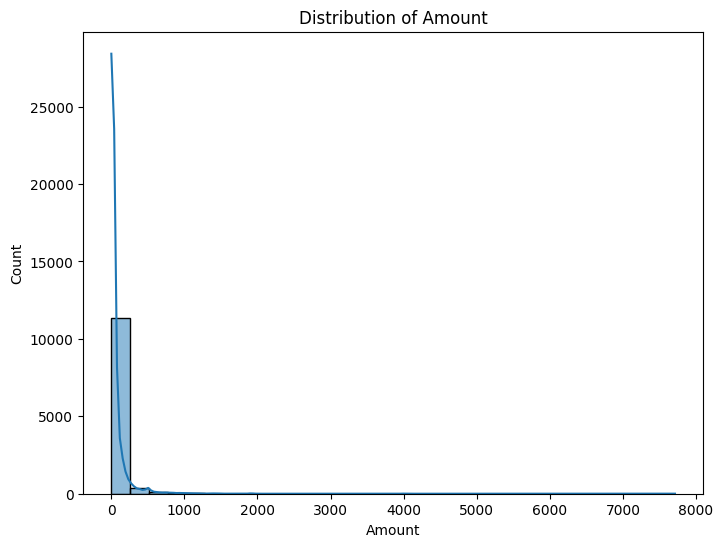

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

In [8]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
logistic_regression = LogisticRegression(max_iter=5000, solver='sag')
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
neural_network = MLPClassifier()

In [11]:
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
neural_network.fit(X_train, y_train)

MLPClassifier()

In [12]:
lr_predictions = logistic_regression.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
svm_predictions = svm.predict(X_test)
nn_predictions = neural_network.predict(X_test)

In [13]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
nn_accuracy = accuracy_score(y_test, nn_predictions)

In [14]:
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Neural Network Accuracy:", nn_accuracy)

Logistic Regression Accuracy: 0.9949832775919732
Decision Tree Accuracy: 0.9983277591973244
Random Forest Accuracy: 0.9991638795986622
Support Vector Machine Accuracy: 0.9949832775919732
Neural Network Accuracy: 0.9974916387959866


In [17]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Define a list of models
models = [logistic_regression, decision_tree, random_forest, svm, neural_network]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Neural Network']

# Initialize a list to store the metrics for each model
metrics_table = []

# Evaluate metrics for each model
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    
    metrics_table.append([name, accuracy, precision, recall, f1, auc_roc, avg_precision])

# Print metrics table
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Avg Precision']
print(tabulate(metrics_table, headers, tablefmt='github'))


| Model               |   Accuracy |   Precision |   Recall |   F1-Score |   AUC-ROC |   Avg Precision |
|---------------------|------------|-------------|----------|------------|-----------|-----------------|
| Logistic Regression |   0.994983 |    1        | 0        |   0        |  0.5      |      0.00501672 |
| Decision Tree       |   0.998328 |    0.833333 | 0.833333 |   0.833333 |  0.916246 |      0.695281   |
| Random Forest       |   0.999164 |    1        | 0.833333 |   0.909091 |  0.916667 |      0.834169   |
| SVM                 |   0.994983 |    1        | 0        |   0        |  0.5      |      0.00501672 |
| Neural Network      |   0.997492 |    0.75     | 0.75     |   0.75     |  0.87437  |      0.563754   |


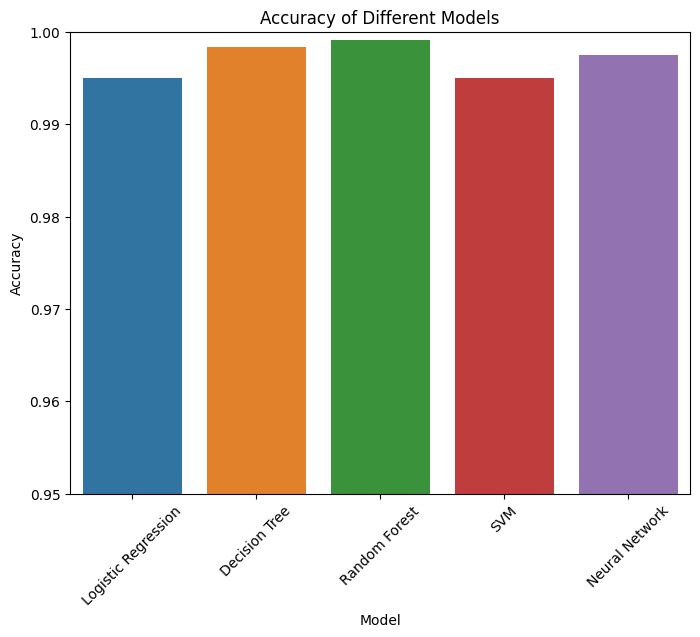

In [18]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Neural Network']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, nn_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.show()

In [19]:
from sklearn.metrics import average_precision_score

# Calculate AUPRC for each model
lr_auprc = average_precision_score(y_test, lr_predictions)
dt_auprc = average_precision_score(y_test, dt_predictions)
rf_auprc = average_precision_score(y_test, rf_predictions)
svm_auprc = average_precision_score(y_test, svm_predictions)
nn_auprc = average_precision_score(y_test, nn_predictions)

# Print AUPRC values
print("Logistic Regression AUPRC:", lr_auprc)
print("Decision Tree AUPRC:", dt_auprc)
print("Random Forest AUPRC:", rf_auprc)
print("SVM AUPRC:", svm_auprc)
print("Neural Network AUPRC:", nn_auprc)


Logistic Regression AUPRC: 0.005016722408026756
Decision Tree AUPRC: 0.6952805648457824
Random Forest AUPRC: 0.8341694537346712
SVM AUPRC: 0.005016722408026756
Neural Network AUPRC: 0.5637541806020067
